C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9684\967355812.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


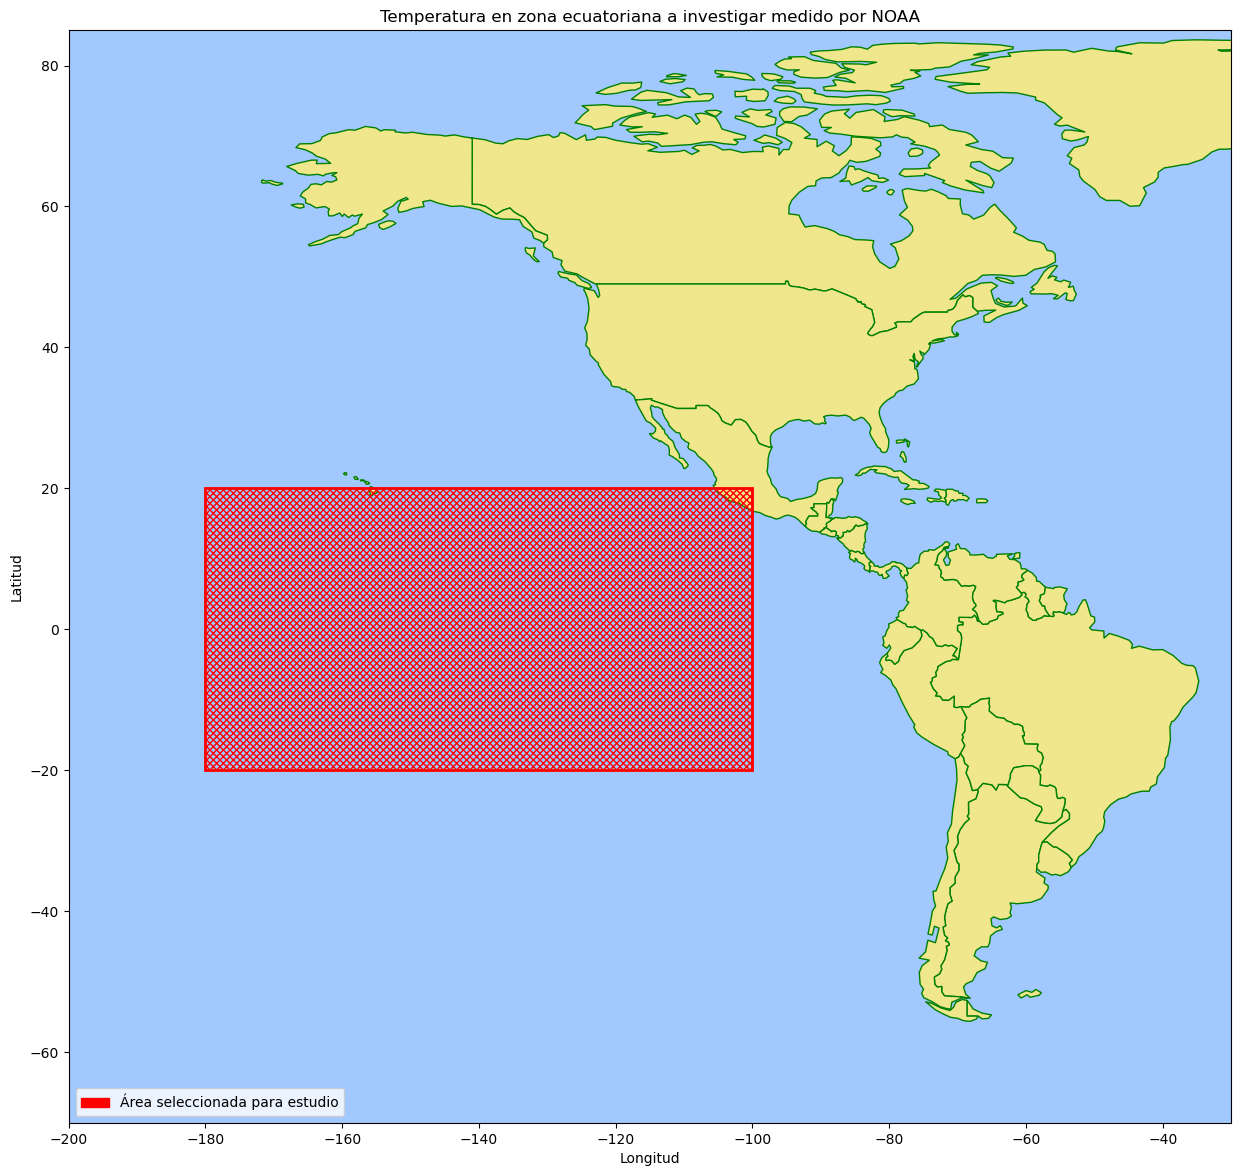

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define colors for water and land
water_color = '#a1c8ff'  # light blue, almost transparent
land_color = '#f0e68c'  # khaki, a shade of light yellow

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for the Americas
americas = world[(world.continent == "North America") | (world.continent == "South America")]

# Define the bounds of the rectangle (180W to 100W and reasonable latitudes for visualization)
bounds = [-180, -100, -20, 20]

# Plot the map
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the Americas with the land color and keep the country borders
americas.plot(ax=ax, color=land_color, edgecolor='green')

# Set the ocean color for the area inside the axes
ax.set_facecolor(water_color)  # Set the plot's background color to represent the ocean

# Add the red rectangle for the study area
rect = patches.Rectangle((bounds[0], bounds[2]), bounds[1] - bounds[0], bounds[3] - bounds[2],
                         linewidth=2, edgecolor='red', facecolor='none', zorder=3)
ax.add_patch(rect)

# Add hatching within the rectangle. We use a higher density of slashes to ensure visibility.
hatching = ax.add_patch(patches.Rectangle((bounds[0], bounds[2]), bounds[1] - bounds[0], bounds[3] - bounds[2],
                                          fill=False, hatch='xxxxx', edgecolor='red', zorder=2))

# Re-create the legend for the rectangle
red_patch = patches.Patch(color='red', label='Área seleccionada para estudio', hatch='xxxxx')
ax.legend(handles=[red_patch], loc='lower left')

# Set the x and y axis labels
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Set the title of the plot
ax.set_title('Temperatura en zona ecuatoriana a investigar medido por NOAA')

# Set the x and y axis limits to include the ocean
ax.set_xlim(-200, -30)
ax.set_ylim(-70, 85)

# Show the plot
plt.show()


In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL de la página
url = 'https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php'

# Enviar una solicitud a la página
response = requests.get(url)

# Analizar el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Encontrar la tabla
table = soup.find('table', {'border': '1', 'align': 'center'})

# Leer la tabla en un DataFrame
df = pd.read_html(str(table))[0]

# Mostrar el DataFrame
print(df)


      0     1     2     3     4     5     6     7     8     9     10    11  \
0   Year   DJF   JFM   FMA   MAM   AMJ   MJJ   JJA   JAS   ASO   SON   OND   
1   1950  -1.5  -1.3  -1.2  -1.2  -1.1  -0.9  -0.5  -0.4  -0.4  -0.4  -0.6   
2   1951  -0.8  -0.5  -0.2   0.2   0.4   0.6   0.7   0.9   1.0   1.2   1.0   
3   1952   0.5   0.4   0.3   0.3   0.2   0.0  -0.1   0.0   0.2   0.1   0.0   
4   1953   0.4   0.6   0.6   0.7   0.8   0.8   0.7   0.7   0.8   0.8   0.8   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
77  Year   DJF   JFM   FMA   MAM   AMJ   MJJ   JJA   JAS   ASO   SON   OND   
78  2020   0.5   0.5   0.4   0.2  -0.1  -0.3  -0.4  -0.6  -0.9  -1.2  -1.3   
79  2021  -1.0  -0.9  -0.8  -0.7  -0.5  -0.4  -0.4  -0.5  -0.7  -0.8  -1.0   
80  2022  -1.0  -0.9  -1.0  -1.1  -1.0  -0.9  -0.8  -0.9  -1.0  -1.0  -0.9   
81  2023  -0.7  -0.4  -0.1   0.2   0.5   0.8   1.1   1.3   1.6   1.8   NaN   

      12  
0    NDJ  
1   -0.8  
2    0.8  
3    0.1  
4    0.8

In [5]:
df.to_csv("datanoa.csv")

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
1,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
2,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
3,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
4,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
78,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
79,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
80,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8


In [13]:
# Establecer la primera fila como encabezado
df.columns = df.iloc[0]

In [15]:
# Eliminar filas que contengan strings en lugar de números (filas de encabezado repetidas)
df = df[~df['Year'].str.isalpha()]

In [18]:
# Convertir la columna 'Year' a entero
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14804\1530955716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


In [19]:
df

,Year,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
1,1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
2,1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
3,1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
4,1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
5,1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
78,2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
79,2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0
80,2022,-1.0,-0.9,-1.0,-1.1,-1.0,-0.9,-0.8,-0.9,-1.0,-1.0,-0.9,-0.8


In [20]:
df.dtypes

0
Year     int64
DJF     object
JFM     object
FMA     object
MAM     object
AMJ     object
MJJ     object
JJA     object
JAS     object
ASO     object
SON     object
OND     object
NDJ     object
dtype: object

In [21]:
# Crear una serie de tiempo a partir del DataFrame
df_melted = df.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')

# Mapeo de los códigos de mes a los meses correspondientes
month_mapping = {
    'DJF': '12', 'JFM': '01', 'FMA': '02', 'MAM': '03',
    'AMJ': '04', 'MJJ': '05', 'JJA': '06', 'JAS': '07',
    'ASO': '08', 'SON': '09', 'OND': '10', 'NDJ': '11'
}

df_melted['Month'] = df_melted['Month'].map(month_mapping)

# Ajustar el año para los meses de diciembre (DJF)
df_melted.loc[df_melted['Month'] == '12', 'Year'] = df_melted['Year'].astype(int) - 1

# Crear una columna de fecha con formato 'mes-año'
df_melted['Date'] = pd.to_datetime(df_melted['Year'].astype(str) + '-' + df_melted['Month'], format='%Y-%m').dt.to_period('M')

# Ordenar y mostrar el DataFrame resultante
df_melted = df_melted.sort_values(by='Date').drop(columns=['Year', 'Month'])
df_melted.head()

,Temperature,Date
0,-1.5,1949-12
74,-1.3,1950-01
148,-1.2,1950-02
222,-1.2,1950-03
296,-1.1,1950-04


In [22]:
df_melted

,Temperature,Date
0,-1.5,1949-12
74,-1.3,1950-01
148,-1.2,1950-02
222,-1.2,1950-03
296,-1.1,1950-04
...,...,...
591,1.3,2023-07
665,1.6,2023-08
739,1.8,2023-09
813,NaN,2023-10


In [24]:
df_melted.dtypes

Temperature       object
Date           period[M]
dtype: object

In [25]:
import pandas as pd
import plotly.express as px

# Asegúrate de que 'df_melted' es tu DataFrame
df_melted['Date'] = df_melted['Date'].dt.to_timestamp()
df_melted['Temperature'] = pd.to_numeric(df_melted['Temperature'], errors='coerce')

# Crear un gráfico de serie de tiempo con Plotly
fig = px.line(df_melted, x='Date', y='Temperature', title='Serie de Tiempo de la Temperatura')

# Mostrar el gráfico
fig.show()


In [27]:
import pandas as pd
import plotly.express as px

# Convertir la columna 'Temperature' a numérico
df_melted['Temperature'] = pd.to_numeric(df_melted['Temperature'], errors='coerce')

# Crear una columna 'Condition' basada en el valor de 'Temperature'
df_melted['Condition'] = df_melted['Temperature'].apply(lambda x: 'La Niña' if x < 0 else 'El Niño')

# Crear un gráfico de serie de tiempo con Plotly
fig = px.line(df_melted, x='Date', y='Temperature', color='Condition', 
              title='Serie de Tiempo de la Temperatura con Condiciones El Niño y La Niña',
              labels={'Temperature': 'Temperatura', 'Date': 'Fecha'})

# Mostrar el gráfico
fig.show()


In [28]:
df_melted

,Temperature,Date,Condition
0,-1.5,1949-12-01,La Niña
74,-1.3,1950-01-01,La Niña
148,-1.2,1950-02-01,La Niña
222,-1.2,1950-03-01,La Niña
296,-1.1,1950-04-01,La Niña
...,...,...,...
591,1.3,2023-07-01,El Niño
665,1.6,2023-08-01,El Niño
739,1.8,2023-09-01,El Niño
813,NaN,2023-10-01,El Niño


In [29]:
import plotly.graph_objects as go

# Crear una figura de Plotly
fig = go.Figure()

# Agregar línea para valores positivos (El Niño)
fig.add_trace(go.Scatter(
    x=df_melted['Date'],
    y=df_melted['Temperature'],
    mode='lines',
    name='El Niño',
    line=dict(color='red'),
    customdata=df_melted['Temperature'],
    hovertemplate='%{x}: %{customdata} (El Niño)',
    showlegend=False,
    fill='tozeroy'
))

# Agregar línea para valores negativos (La Niña)
fig.add_trace(go.Scatter(
    x=df_melted['Date'],
    y=df_melted['Temperature'].clip(upper=0),
    mode='lines',
    name='La Niña',
    line=dict(color='blue'),
    customdata=df_melted['Temperature'],
    hovertemplate='%{x}: %{customdata} (La Niña)',
    showlegend=False,
    fill='tozeroy'
))

# Actualizar diseño del gráfico
fig.update_layout(
    title='Serie de Tiempo de la Temperatura con Condiciones El Niño y La Niña',
    xaxis_title='Fecha',
    yaxis_title='Temperatura'
)

# Mostrar el gráfico
fig.show()


In [30]:
import plotly.graph_objects as go

# Crear una figura de Plotly
fig = go.Figure()

# Agregar línea para valores positivos (El Niño)
fig.add_trace(go.Scatter(
    x=df_melted['Date'],
    y=df_melted['Temperature'],
    mode='lines',
    name='El Niño',
    line=dict(color='red'),
    customdata=df_melted['Temperature'],
    hovertemplate='%{x}: %{customdata} (El Niño)',
    fill='tozeroy'
))

# Agregar línea para valores negativos (La Niña)
fig.add_trace(go.Scatter(
    x=df_melted['Date'],
    y=df_melted['Temperature'].clip(upper=0),
    mode='lines',
    name='La Niña',
    line=dict(color='blue'),
    customdata=df_melted['Temperature'],
    hovertemplate='%{x}: %{customdata} (La Niña)',
    fill='tozeroy'
))

# Actualizar diseño del gráfico
fig.update_layout(
    title='Serie de Tiempo de la Temperatura con Condiciones El Niño y La Niña',
    xaxis_title='Fecha',
    yaxis_title='Temperatura',
    legend_title='Condiciones'
)

# Mostrar el gráfico
fig.show()


In [34]:
# Filtrar la fila que contiene los datos de Hidráulica
df_hidraulica = df[df[df.columns[0]] == "Hidraulica"]

# Eliminar la primera columna y transponer el DataFrame para que cada fila represente un año
df_hidraulica = df_hidraulica.drop(df_hidraulica.columns[0], axis=1).T
df_hidraulica.columns = ["Generación Hidráulica"]

# Resetear el índice para tener una columna de años
df_hidraulica = df_hidraulica.reset_index()
df_hidraulica.rename(columns={"index": "Año"}, inplace=True)

# Convertir la columna 'Año' a datetime
df_hidraulica['Año'] = pd.to_datetime(df_hidraulica['Año'], format='%Y')

# Crear el gráfico de serie de tiempo con Plotly
fig = px.line(df_hidraulica, x='Año', y='Generación Hidráulica', title='Serie de Tiempo de Generación Hidráulica')

# Mostrar el gráfico
fig.show()


In [35]:
# Lista de fuentes de energía a incluir
fuentes_energia = ["Hidraulica", "Solar PV + CSP", "Eólica", "Geotérmica", "Biomasa", "Total renovable"]

# Preparar DataFrame para cada fuente de energía y unirlos
df_series = pd.DataFrame()

for fuente in fuentes_energia:
    df_temp = df[df[df.columns[0]] == fuente]
    df_temp = df_temp.drop(df_temp.columns[0], axis=1).T
    df_temp.columns = [fuente]
    df_temp = df_temp.reset_index()
    df_temp.rename(columns={"index": "Año"}, inplace=True)
    df_temp['Año'] = pd.to_datetime(df_temp['Año'], format='%Y')
    df_series = pd.concat([df_series, df_temp.set_index('Año')], axis=1)

# Restablecer el índice
df_series = df_series.reset_index()

# Crear el gráfico de serie de tiempo con Plotly
fig = px.line(df_series, x='Año', y=df_series.columns[1:], title='Serie de Tiempo de Generación de Energía Renovable en Chile')

# Mostrar el gráfico
fig.show()

In [36]:
df

,Generación SEN/SIC/SING [GWh],1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Hidraulica,16051.0,18040.0,15194.0,12817.0,18508.0,21058.0,22524.0,21864.0,20889.0,...,19514.0,23511.0,23866.0,19446.0,21768.0,23218.0,20797.0,20637.0,16016.0,20290.0
1,Solar PV + CSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,459.0,1360.0,2550.0,3896.0,5083.0,6347.0,7638.0,10215.0,14463.0
2,Eólica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,539.0,1411.0,2080.0,2252.0,3507.0,3918.0,4812.0,5537.0,7095.0,8872.0
3,Biomasa,238.0,653.0,813.0,914.0,617.0,387.0,374.0,432.0,646.0,...,2257.0,2715.0,2384.0,2643.0,2456.0,1669.0,1820.0,1883.0,1946.0,1895.0
4,Geotérmica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.0,214.0,202.0,246.0,317.0,465.0
5,Cogeneración,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,122.0,134.0,131.0,137.0,864.0,130.0,184.0,303.0,281.0
6,Otras renovables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total renovable,16289.0,18693.0,16007.0,13731.0,19125.0,21445.0,22898.0,22296.0,21535.0,...,22317.0,28096.0,29690.0,26891.0,31691.0,34966.0,34108.0,36125.0,35892.0,46266.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,carbon,9733.0,8588.0,10330.0,13034.0,9429.0,6272.0,6901.0,6783.0,9404.0,...,31548.0,28893.0,28622.0,32456.0,29407.0,29453.0,28390.0,27008.0,27617.0,19291.0


In [39]:
# Lista de fuentes de energía renovables y no renovables a incluir
fuentes_energia = ["Hidraulica", "Solar PV + CSP", "Eólica", "Geotérmica", "Biomasa", "Total renovable", 
                   "carbon", "gas natural", "petroleo", "subtotal no renovable"]

# Preparar DataFrame para cada fuente de energía y unirlos
df_series = pd.DataFrame()

for fuente in fuentes_energia:
    if fuente in df[df.columns[0]].values:
        df_temp = df[df[df.columns[0]] == fuente]
        df_temp = df_temp.drop(df_temp.columns[0], axis=1).T
        df_temp.columns = [fuente]
        df_temp = df_temp.reset_index()
        df_temp.rename(columns={"index": "Año"}, inplace=True)
        df_temp['Año'] = pd.to_datetime(df_temp['Año'], format='%Y')
        df_series = pd.concat([df_series, df_temp.set_index('Año')], axis=1)
    else:
        print(f"Fuente '{fuente}' no encontrada en los datos")

# Restablecer el índice
df_series = df_series.reset_index()

# Crear el gráfico de serie de tiempo con Plotly
fig = px.line(df_series, x='Año', y=df_series.columns[1:], title='Serie de Tiempo de Generación de Energía en Chile')

# Mostrar el gráfico
fig.show()

Fuente 'petroleo' no encontrada en los datos
Fuente 'subtotal no renovable' no encontrada en los datos


In [45]:
# Lista de fuentes de energía a incluir, asegúrate de que los nombres coincidan con tu archivo
fuentes_energia = ["Hidraulica", "Solar PV + CSP", "Eólica", "Geotérmica", "Biomasa", 
                   "carbon", "gas natural", "petroleo "]

# Preparar DataFrame para cada fuente de energía
df_series = pd.DataFrame()

for fuente in fuentes_energia:
    if fuente in df[df.columns[0]].values:
        df_temp = df[df[df.columns[0]] == fuente]
        df_temp = df_temp.iloc[:, 1:].T
        df_temp.columns = [fuente]
        df_temp = df_temp.reset_index()
        df_temp.rename(columns={"index": "Año"}, inplace=True)
        df_temp['Año'] = pd.to_datetime(df_temp['Año'], format='%Y')
        df_series = pd.concat([df_series, df_temp.set_index('Año')], axis=1)

# Restablecer el índice
df_series = df_series.reset_index()

# Crear el gráfico de serie de tiempo con Plotly
fig = px.line(df_series, x='Año', y=df_series.columns[1:], title='Serie de Tiempo de Generación de Energía en Chile')

# Mostrar el gráfico
fig.show()

In [42]:
# Obtener los nombres de los strings de la primera columna
nombres_strings = df[df.columns[0]].dropna().unique()

print(nombres_strings)

['Hidraulica' 'Solar PV + CSP' 'Eólica' 'Biomasa' 'Geotérmica'
 'Cogeneración' 'Otras renovables' 'Total renovable' 'carbon'
 'gas natural' 'petroleo ' 'subtotal no renovable '
 'TOTAL SEN/SIC/SING [GWh]\t ']


In [46]:
df_melted = df_series.melt(id_vars=["Año"], var_name="Tipo de Energía", value_name="Generación [GWh]")

# Crear el gráfico de barras apiladas con Plotly
fig = px.bar(df_melted, x="Año", y="Generación [GWh]", color="Tipo de Energía", 
             title="Generación de Energía en Chile (Barras Apiladas)",
             labels={'Año':'Año', 'Generación [GWh]':'Generación [GWh]', 'Tipo de Energía':'Tipo de Energía'})

# Mostrar el gráfico
fig.show()

In [49]:
import plotly.express as px

# Usar melt para reestructurar el DataFrame para el gráfico de barras apiladas
df_melted = df_series.melt(id_vars=["Año"], var_name="Tipo de Energía", value_name="Generación [GWh]")

# Crear el gráfico de barras apiladas con Plotly
fig = px.bar(df_melted, x="Año", y="Generación [GWh]", color="Tipo de Energía", 
             title="Generación de Energía en Chile ")

# Actualizar el gráfico para mostrar todos los valores en el eje Y sin abreviaturas
fig.update_layout(yaxis_tickformat='d')

# Mostrar el gráfico
fig.show()


In [50]:
df_melted

,Año,Tipo de Energía,Generación [GWh]
0,1996-01-01,Hidraulica,16051.0
1,1997-01-01,Hidraulica,18040.0
2,1998-01-01,Hidraulica,15194.0
3,1999-01-01,Hidraulica,12817.0
4,2000-01-01,Hidraulica,18508.0
...,...,...,...
211,2018-01-01,petroleo,1209.0
212,2019-01-01,petroleo,683.0
213,2020-01-01,petroleo,908.0
214,2021-01-01,petroleo,2183.0


In [51]:
# Realizar análisis descriptivo para cada tipo de energía
df_descriptive = df_melted.groupby('Tipo de Energía')['Generación [GWh]'].describe()
df_descriptive


,count,mean,std,min,25%,50%,75%,max
Tipo de Energía,,,,,,,,
Biomasa,27.0,1258.518519,793.596602,238.0,631.50,888.0,1889.00,2715.0
Eólica,16.0,2572.500000,2788.947735,3.0,324.75,1745.5,4141.50,8872.0
Geotérmica,6.0,251.333333,133.353165,64.0,205.00,230.0,299.25,465.0
Hidraulica,27.0,20809.888889,3303.754255,12817.0,19480.00,20889.0,22871.00,28068.0
Solar PV + CSP,10.0,5201.800000,4608.438511,7.0,1657.50,4489.5,7315.25,14463.0
carbon,27.0,18361.407407,9141.749737,6272.0,9581.00,15736.0,28003.50,32456.0
gas natural,26.0,10873.307692,4369.611074,42.0,9968.50,12023.0,14025.75,17508.0
petroleo,27.0,3010.851852,3656.516056,21.0,764.00,1889.0,2846.00,13598.0


In [55]:
import matplotlib.pyplot as plt

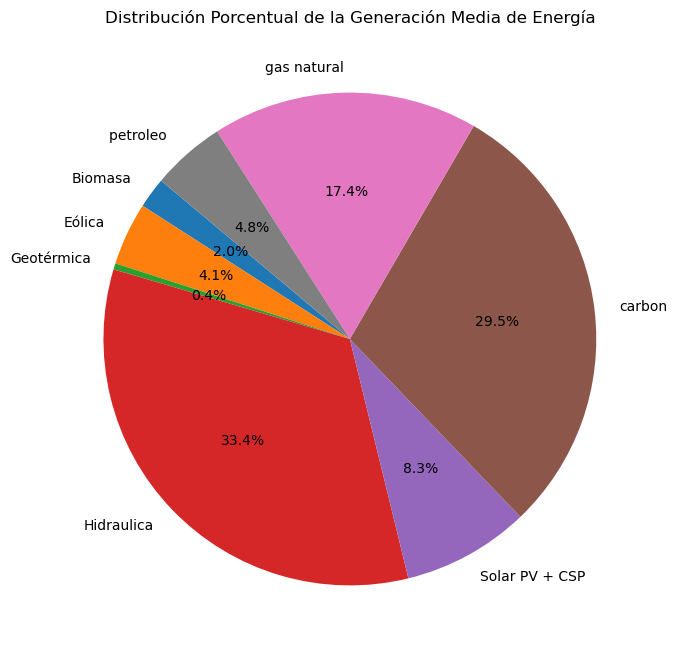

In [56]:
# Extraer los datos de la media para cada tipo de energía
mean_values = df_descriptive['mean']
labels = mean_values.index

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(mean_values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución Porcentual de la Generación Media de Energía')
plt.show()

In [57]:
import plotly.express as px

# Asumiendo que 'df_descriptive' es tu DataFrame
fig = px.pie(df_descriptive, values='mean', names=df_descriptive.index, 
             color_discrete_sequence=px.colors.sequential.RdBu, 
             title='Distribución Porcentual de la Generación Media de Energía')

# Configurar la leyenda y los números en el gráfico
fig.update_traces(textinfo='percent+label', textfont_size=14, textfont_color='white')
fig.update_layout(legend_title_text='Tipo de Energía')

fig.show()


In [58]:
df_descriptive.to_excel("analisis_descriptivo_generacion.xlsx")